# Computer vision - MNIST

In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
#mnist.load_data?

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
%matplotlib inline
import matplotlib as mpl

In [8]:
import matplotlib.pyplot as plt

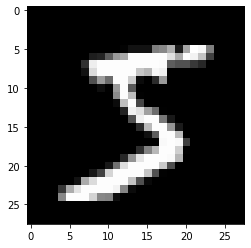

In [9]:
plt.imshow(x_train[0], cmap=plt.cm.gray, interpolation='nearest')

In [10]:
print(y_train[0])

5


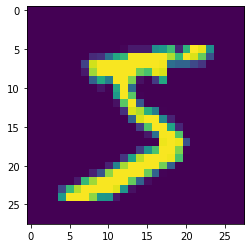

In [11]:
plt.imshow(x_train[0])

In [12]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [13]:
x_train, x_test = x_train/255.0, x_test/255.0

## Training model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

#model.add(Dense(32, activation='relu', input_shape=(784,))) # <--- if the images are already flattened
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
# ignoring for now...
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

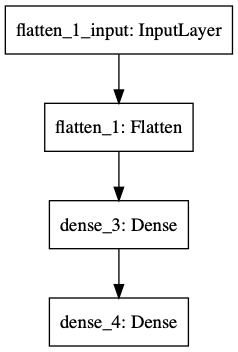

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

This is the image:

![model](model.png)

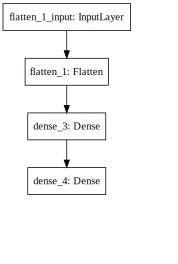

In [17]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Read about optimizers [here](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a) and specifically about [Adam optimizer](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

In [20]:
class accuracy99Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\n\nWe reached 99.9% accuracy!\n")
            self.model.stop_training = True

In [21]:
%%time
# ~ 2 min
model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), callbacks=[accuracy99Callback()])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2273 - accuracy: 0.9351 - val_loss: 0.1160 - val_accuracy: 0.9665
Epoch 2/40
60000/60000 [==============================] - 5s 76us/sample - loss: 0.0952 - accuracy: 0.9711 - val_loss: 0.0826 - val_accuracy: 0.9746
Epoch 3/40
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0766 - val_accuracy: 0.9771
Epoch 4/40
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0782 - val_accuracy: 0.9765
Epoch 5/40
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0787 - val_accuracy: 0.9775
Epoch 6/40
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0877 - val_accuracy: 0.9760
Epoch 7/40
60000/60000 [==============================] 

In [22]:
print(model.history.history)

{'loss': [0.22734843279620012, 0.09517444741142293, 0.06226254887760927, 0.043182951962264876, 0.03323384527309487, 0.024254760986356996, 0.019899540762091057, 0.015611843861627858, 0.013239702265354572, 0.01121548642944496, 0.010701380411263138, 0.00862873294345609, 0.00821391889449939, 0.0070468606409464654, 0.007455729060341097, 0.006731101097210755, 0.006038245120394489, 0.004407805613402237, 0.005804736319775513, 0.005050091762298232, 0.00532085078274223, 0.005694835726663897, 0.004877211774180846, 0.004758218642821972, 0.0035304498021607625, 0.0039210882797321095, 0.0051703209798585345, 0.003888563878848715, 0.004091898559943648, 0.003436536732860185, 0.0017698911759150592], 'accuracy': [0.9351, 0.97105, 0.9812, 0.98658335, 0.99001664, 0.99256665, 0.994, 0.9948, 0.9957, 0.9963667, 0.9966, 0.99725, 0.99738336, 0.99771667, 0.99773335, 0.9978333, 0.99815, 0.99873334, 0.9981, 0.99835, 0.99845, 0.99801666, 0.99848336, 0.99848336, 0.99873334, 0.99865, 0.9981667, 0.9984667, 0.9988, 0.99

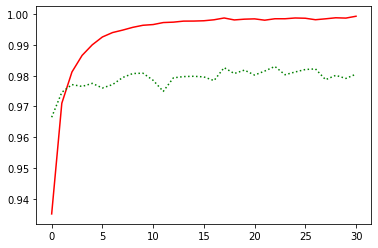

In [23]:
plt.plot(model.history.history['accuracy'], 'r-')
plt.plot(model.history.history['val_accuracy'], 'g:')

In [24]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.14474958889923467, 0.9805]

Train on 45000 samples, validate on 15000 samples
Epoch 1/5
45000/45000 [==============================] - 6s 135us/sample - loss: 0.2287 - accuracy: 0.9332 - val_loss: 0.1368 - val_accuracy: 0.9591
Epoch 2/5
45000/45000 [==============================] - 5s 120us/sample - loss: 0.0943 - accuracy: 0.9715 - val_loss: 0.1033 - val_accuracy: 0.9688
Epoch 3/5
45000/45000 [==============================] - 5s 117us/sample - loss: 0.0607 - accuracy: 0.9808 - val_loss: 0.0963 - val_accuracy: 0.9722
Epoch 4/5
45000/45000 [==============================] - 5s 116us/sample - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0978 - val_accuracy: 0.9736
Epoch 5/5
45000/45000 [==============================] - 5s 116us/sample - loss: 0.0323 - accuracy: 0.9896 - val_loss: 0.0993 - val_accuracy: 0.9739


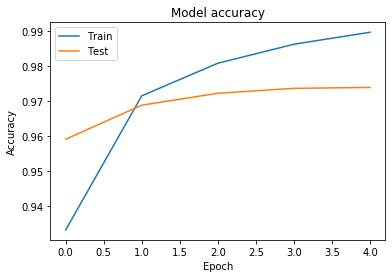

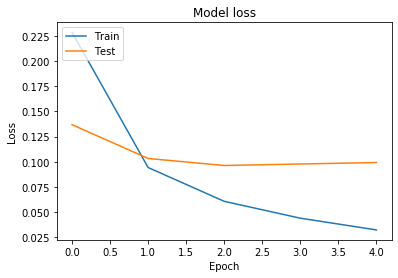

CPU times: user 54.1 s, sys: 14.7 s, total: 1min 8s
Wall time: 27.7 s


In [25]:
%%time
# ~30 seconds
import matplotlib.pyplot as plt

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.25,
                    epochs=5,
                    batch_size=16,
                    verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [27]:
print(model.weights)

[<tf.Variable 'dense_5/kernel:0' shape=(784, 256) dtype=float32, numpy=
array([[ 7.27067590e-02,  3.85074392e-02,  2.62626335e-02, -4.66297194e-02,  1.18134245e-02,  2.39089876e-02, -3.64698619e-02, -3.89249995e-02, -3.79204750e-04, -3.49375904e-02,  4.25164849e-02,  5.82495183e-02, -2.50489041e-02, -5.94197139e-02, -5.41361570e-02,  7.14363754e-02,  2.23876834e-02, -2.08088718e-02,  2.25682855e-02, -3.20922919e-02, -7.54351765e-02,  2.31077075e-02, -2.79553197e-02, -7.12670162e-02, -1.99370794e-02,  6.27890378e-02,  1.98968425e-02, -1.20941326e-02, -3.79972160e-03,  2.68661082e-02, ..., -6.18251413e-03, -2.16225535e-03,  5.71508259e-02, -1.99010968e-02, -2.82281712e-02, -4.00249511e-02,  1.40126571e-02,  6.15363121e-02, -5.46685606e-03,  5.77944666e-02, -5.89294247e-02,  2.08252221e-02, -7.57142156e-02, -5.89454696e-02, -4.80528921e-03,  6.96334839e-02,  1.27023086e-02, -3.42089683e-02, -7.28000849e-02, -3.24564502e-02, -6.16628826e-02, -7.29892030e-02, -5.00371419e-02,  3.28657329e-0

In [28]:
last = model.get_layer(index=-1)

In [29]:
last.weights[1]

<tf.Variable 'dense_6/bias:0' shape=(10,) dtype=float32, numpy=array([-0.03559068, -0.12926844, -0.06826031, -0.08741374,  0.08613735,  0.00359699, -0.02606919, -0.05780616,  0.23754582, -0.00914928], dtype=float32)>

In [30]:
inp = x_test[0].reshape((1, 28, 28))
res = model.predict(inp)

In [31]:
y_test[0]

7

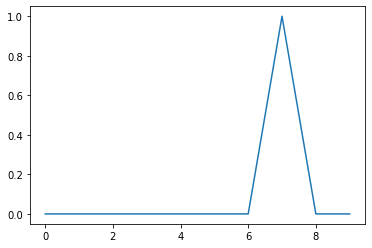

In [32]:
plt.plot(range(10), res[0])

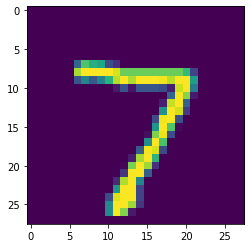

In [33]:
plt.imshow(x_test[0])